<html>
    <div dir = "rtl" style="font-size: 26px; color: blue">
        <b>
            فاز اول پروژه پنجم درس هوش مصنوعی
            <br>
            <br>
            Neuaral Networks
            <br>
            <br>
            Phase #1
        </b>
    </div>
<br>
<br>
<br>
    <div dir = "rtl" style="font-size: 24px; color: gray">
        <b>
            معین کرمی
            <br>
            <br>
            810198540
        </b>
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            هدف پروژه:
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <b>
            <br>
             هدف از این پروژه آشنایی با
            Neural Networks
            و ساخت یک 
            مدل پردازش تصویر برای تشخیص ارقام فارسی
            است.
        <br>
        <br>
    </div>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            خلاصه ی مسئله:
        </b>
    </div>
    <br>
    <div dir = "rtl" style = "font-size: 16px">
            در این مسئله یک مجموعه داده شامل عکس ارقام فارسی به ما داده شده که ما باید با پیاده سازی یک مدل شبکه عصبی با استفاده از این دیتا، ارقام فارسی نوشته شده در عکس ها را تشخیص بدهیم.
    </div>
</html>


<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            بخش اول: بررسی و پیش‌پردازش داده
        </b>
    </div>
</html>

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from random import randint
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
pkl_labels = open('dataset/labels.pkl', 'rb')
labels = pickle.load(pkl_labels)
pkl_pics = open('dataset/data.pkl', 'rb')
pics = pickle.load(pkl_pics)
real_pics = copy.deepcopy(pics)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            تقسیم داده های 
            test
            و
            train
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        ۲ درصد 
        داده را برای 
        test data
        در نظر می‌گیریم.
    </div>
</html>

In [3]:
data = pd.DataFrame({'pic' : pics, 'label' : labels})

In [4]:
train, test = train_test_split(data, test_size = 0.02)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            1)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    <br>
        مقدار هر پیکسل میان ۰ و ۲۵۵ است.
    </div>
</html>

(array([22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

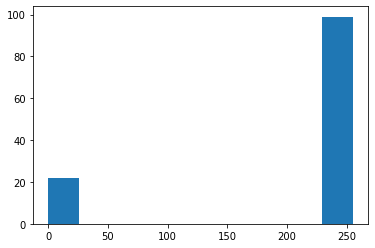

In [5]:
index = randint(0, len(train))
plt.hist(train['pic'][index].reshape(-1))

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            ۲)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    <br>
        برای این کار از کتابخانه 
        cv2
        و تابع 
        cv2.resize
        استفاده می‌کنیم.
    </div>
</html>

In [6]:
for i in range(len(data)):
    data.at[i, 'pic'] = cv2.resize(data.at[i, 'pic'], (25, 25))
train, test = train_test_split(data, test_size = 0.02)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            3)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

6


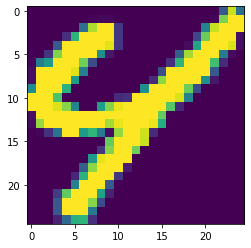

1


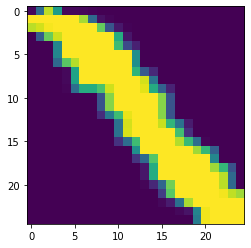

8


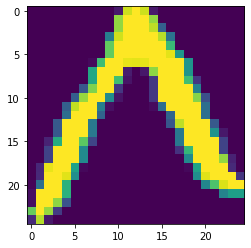

9


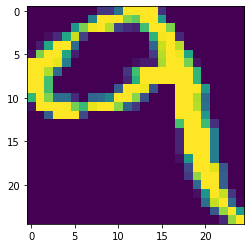

7


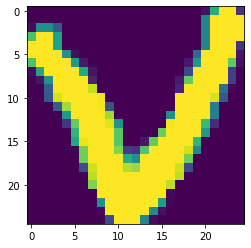

3


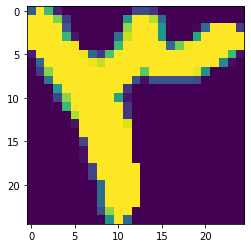

2


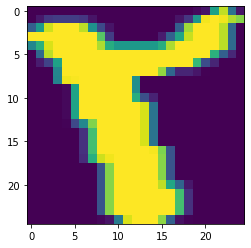

4


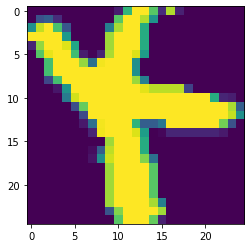

0


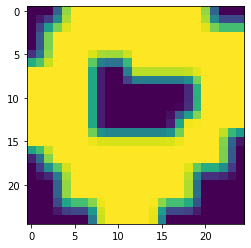

5


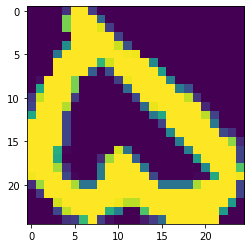

In [7]:
check = dict()

for index, row in train.iterrows():
    pic_label = row['label']
    if pic_label not in check:
        print (pic_label)
        check[pic_label] = True
        plt.imshow(row['pic'])
        plt.show()

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            4)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        train :
    </div>
</html>

[[    0  9881]
 [    1 10115]
 [    2  9731]
 [    3 10105]
 [    4 10114]
 [    5  9913]
 [    6 10040]
 [    7 10146]
 [    8 10067]
 [    9 10192]]


<BarContainer object of 10 artists>

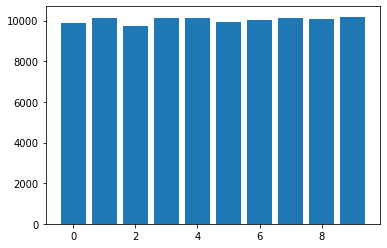

In [8]:
unique, counts = np.unique(train['label'], return_counts=True)
print (np.asarray((unique, counts)).T)
plt.bar(unique, counts)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        test :
    </div>
</html>

[[  0 189]
 [  1 215]
 [  2 192]
 [  3 229]
 [  4 219]
 [  5 197]
 [  6 214]
 [  7 217]
 [  8 197]
 [  9 179]]


<BarContainer object of 10 artists>

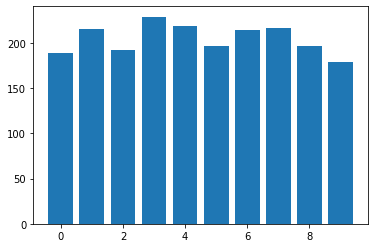

In [9]:
unique, counts = np.unique(test['label'], return_counts=True)
print (np.asarray((unique, counts)).T)
plt.bar(unique, counts)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            5)
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        در صورتی انجام ندادن این کار، تاثیر پیکسل ها با اعداد بزرگ، بسیار بیشتر خواهد شد که باعث کاهش دقت ما می‌شود.
    </div>
</html>

In [10]:
for index, row in train.iterrows():
    for i in range(len(row['pic'])):
        train.at[index, 'pic'][i] = train.at[index, 'pic'][i] / 255.0

In [11]:
for index, row in test.iterrows():
    for i in range(len(row['pic'])):
        test.at[index, 'pic'][i] = test.at[index, 'pic'][i] / 255.0

<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            بخش دوم: تکمیل بخش‌های ناقص شبکه عصبی
        </b>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Dataloader
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [12]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        # TODO: Implement
        onehot_vectors = np.zeros((labels.size, n_classes))
        labels = labels.astype(int)
        index = 0
#         print(labels['label'][0])
        for row in onehot_vectors:
#             print(index, labels['label'][index], '---------------------##----------------##---------------')
            row[labels['label'][index]] = 1
            index += 1
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        # TODO: Implement
        self.__data, self.__onehot_labels = shuffle(self.__data, self.__onehot_labels)
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

<html>
    <div dir = "rtl" style="font-size: 30px; color: green">
        <b>
            Activation Functions
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Identical
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [13]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Relu
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [14]:
class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = copy.deepcopy(matrix)
        relu_value[relu_value < 0] = 0
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = copy.deepcopy(matrix)
        relu_derivative = np.where(relu_derivative <= 0, 0, 1)
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            LeakyRelu
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [15]:
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        leacky_relu_value = copy.deepcopy(matrix)
        leacky_relu_value = np.where(leacky_relu_value > 0, leacky_relu_value, leacky_relu_value * self.negative_slope)
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
#         leacky_relu_derivative = copy.deepcopy(matrix)
#         leacky_relu_derivative = 
        return np.where(matrix <= 0, self.negative_slope * matrix, 1.0)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Sigmoid
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [16]:
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
#         sigmoid_value = 1/(1 + np.exp(-matrix))
        return (1/(1 + np.exp(-matrix)))

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        sigmoid = self.__val(matrix)
#         sigmoid_derivative = np.multiply(sigmoid, 1 - sigmoid)
        return np.multiply(sigmoid, 1 - sigmoid)
        
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Softmax
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [17]:
class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        matrix -= matrix.max(1)
        return np.exp(matrix) / np.exp(matrix).sum(1)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            Tanh
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [18]:
class Tanh:
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        return np.tanh(matrix)

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        return 1 - np.power(np.tanh(matrix), 2)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

<html>
    <div dir = "rtl" style="font-size: 30px; color: green">
        <b>
            Loss Functions
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [19]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number
    zof bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_value = np.sum(-np.multiply(expected_val, np.log(softmax(true_val + 0.00000001) + 0.00000001)), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_derivative = softmax(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

<html>
    <div dir = "rtl" style="font-size: 30px; color: green">
        <b>
            Layer
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [20]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight, 'zero': self.__zero_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
#         print (np.size(self.__weight, 0), np.size(layer_input, 1))
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_activation_input =  (layer_input@self.__weight)+self.__bias
        self.__last_input = copy.deepcopy(layer_input) 
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        backprop_tensor_copy = copy.deepcopy(backprop_tensor)
        dy = np.multiply(backprop_tensor_copy, self.__last_activation_derivative)
        backprop_tensor = np.dot(dy, self.__weight.transpose()) #dL_dx
        
        dW = np.dot(self.__last_input.T, dy)
        self.__weight -= (lr * dW)
        
        ones_ = np.ones((1, dy.shape[0]))
        db = np.dot(ones_, dy)
        self.__bias -= (lr * db)
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low=low, high=high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(loc = mean, scale = np.sqrt(var), size=(dim1, dim2))
        return weights
    
    def __zero_weight(self, dim1, dim2, **initializing_parameters):
        weights = np.zeros(size=(dim1, dim2))
        return weights
    
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

<html>
    <div dir = "rtl" style="font-size: 30px; color: green">
        <b>
            Feed Forward Neural Network
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [21]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        batch_out = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_out, y_batch)
        batch_average_loss = np.mean(self.__loss(batch_out, y_batch))
        self.__update_weights(batch_out, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        out = self.forward(x_batch)
        cross_entropy = CrossEntropy()
        batch_accuracy = self.__compute_accuracy(out,y_batch)
        batch_loss = cross_entropy(out, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(out)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = outputs.argmax(1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        ans = self.__get_labels(expected_output)
        output = self.__get_labels(output)
        return accuracy_score(ans, output)
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backpropagation_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backpropagation_tensor = layer.update_weights(backpropagation_tensor, self.__lr)
        return

<html>
    <div dir = "rtl" style="font-size: 24px; color: orange">
        <b>
            بخش سوم: طبقه بندی داده‌ها
        </b>
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            قسمت اول) آموزش شبکه
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
    </div>
</html>

In [22]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15

tmp = train['pic'].tolist()
for i in range(len(tmp)):
    tmp[i] = tmp[i].reshape(625)
TRAINLOADER = Dataloader(tmp, pd.DataFrame({'label':train['label'].tolist()}), 10, batch_size=32)

tmp = test['pic'].tolist()
for i in range(len(tmp)):
    tmp[i] = tmp[i].reshape(625)
TESTLOADER = Dataloader(tmp, pd.DataFrame({'label':test['label'].tolist()}), 10)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)


Epoch 1:
	Train: Average Accuracy: 0.6767244816586921	Average Loss: 0.8831332833302558
	Test: Average Accuracy: 0.89697265625	Average Loss: 0.3322878484523968
Epoch 2:
	Train: Average Accuracy: 0.9277113237639554	Average Loss: 0.23875675798986656
	Test: Average Accuracy: 0.94287109375	Average Loss: 0.19031011455105445
Epoch 3:
	Train: Average Accuracy: 0.9565988835725678	Average Loss: 0.14713788691574678
	Test: Average Accuracy: 0.9619140625	Average Loss: 0.1291052714577821
Epoch 4:
	Train: Average Accuracy: 0.9668759968102073	Average Loss: 0.1127042449610072
	Test: Average Accuracy: 0.966796875	Average Loss: 0.10832721258415037
Epoch 5:
	Train: Average Accuracy: 0.9721291866028708	Average Loss: 0.09415600077101077
	Test: Average Accuracy: 0.97021484375	Average Loss: 0.09730838600980482
Epoch 6:
	Train: Average Accuracy: 0.9758971291866029	Average Loss: 0.08121652307212401
	Test: Average Accuracy: 0.97216796875	Average Loss: 0.08948291040872877
Epoch 7:
	Train: Average Accuracy: 0.9791

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            قسمت دوم) وزن‌دهی شبکه
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        دقت مدل کاهش می‌یابد
    </div>
</html>

In [23]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='zero')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='zero')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.689164673046252	Average Loss: 0.8584166604749113
	Test: Average Accuracy: 0.8994140625	Average Loss: 0.31623218125117736
Epoch 2:
	Train: Average Accuracy: 0.9306818181818182	Average Loss: 0.2324804255553093
	Test: Average Accuracy: 0.95166015625	Average Loss: 0.17298364668737273
Epoch 3:
	Train: Average Accuracy: 0.957097288676236	Average Loss: 0.14922303571408027
	Test: Average Accuracy: 0.96533203125	Average Loss: 0.12619806322358595
Epoch 4:
	Train: Average Accuracy: 0.9678030303030303	Average Loss: 0.11268700350445132
	Test: Average Accuracy: 0.96826171875	Average Loss: 0.10938324433743343
Epoch 5:
	Train: Average Accuracy: 0.9736443381180223	Average Loss: 0.09135854126792185
	Test: Average Accuracy: 0.97021484375	Average Loss: 0.10076933233527045
Epoch 6:
	Train: Average Accuracy: 0.9776415470494418	Average Loss: 0.07720088530478772
	Test: Average Accuracy: 0.97216796875	Average Loss: 0.09439024852716328
Epoch 7:
	Train: Average Accuracy: 0.98

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            قسمت سوم) تاثیر 
            learning rate
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        مقدار 
        learning rate
        بهینه برابر 0.001
        است.
        <br><br>
        learning rate
        بزرگ تر باعص میشود یادگیری مدل ما سریع‌تر شود ولی افزایش بیش از حد آن باعث اختلال در یادگیری و کاهش دقت می‌شود.
        <br><br>
        در مقابل 
        learning rate
        کوچک باعث میشود ما به مدل و دقت بهینه تر برسیم ولی سرعت یادگیری را کاهش می‌دهد.
    </div>
</html>

In [24]:
LEARNING_RATE = 0.001

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.684988038277512	Average Loss: 0.866342176100601
	Test: Average Accuracy: 0.89404296875	Average Loss: 0.3330104247790888
Epoch 2:
	Train: Average Accuracy: 0.9262161084529505	Average Loss: 0.24708364143670705
	Test: Average Accuracy: 0.94775390625	Average Loss: 0.1798387897635162
Epoch 3:
	Train: Average Accuracy: 0.9553229665071771	Average Loss: 0.15593026013860137
	Test: Average Accuracy: 0.96435546875	Average Loss: 0.13027597905486737
Epoch 4:
	Train: Average Accuracy: 0.9659090909090909	Average Loss: 0.11813497169056016
	Test: Average Accuracy: 0.96875	Average Loss: 0.10871455993728377
Epoch 5:
	Train: Average Accuracy: 0.971750398724083	Average Loss: 0.0965640434503418
	Test: Average Accuracy: 0.97265625	Average Loss: 0.09588250341207138
Epoch 6:
	Train: Average Accuracy: 0.9755980861244019	Average Loss: 0.08206620214763762
	Test: Average Accuracy: 0.974609375	Average Loss: 0.08574686762082005
Epoch 7:
	Train: Average Accuracy: 0.978648325358851

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        learning_rate = 0.01
        <br>
        همانطور که می‌بینید با افزایش بسیار زیاد 
        learning rate
        دقت مدل بسیار کاهش می‌یابد
    </div>
</html>

In [25]:
LEARNING_RATE = 0.01

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10021929824561404	Average Loss: 2.3070951754492675
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 2:
	Train: Average Accuracy: 0.10034888357256778	Average Loss: 2.3048132767581984
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 3:
	Train: Average Accuracy: 0.10034888357256778	Average Loss: 2.3048132767581984
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 4:
	Train: Average Accuracy: 0.10034888357256778	Average Loss: 2.3048132767581984
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 5:
	Train: Average Accuracy: 0.10034888357256778	Average Loss: 2.3048132767581984
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 6:
	Train: Average Accuracy: 0.10034888357256778	Average Loss: 2.3048132767581984
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3031530239489326
Epoch 7:
	Train: Average Accuracy: 0.100

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        learning_rate = 0.0001
        <br>
        همان طور که می‌بینید کاهش 
        learning rate
        به مقدار زیاد نیز باعث کاهش دقت ما می‌شود و زمان بیشتری طول می‌کشد که به دقت مطلوب برسد.
    </div>
</html>

In [26]:
LEARNING_RATE = 0.0001

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10663875598086124	Average Loss: 2.238632957507014
	Test: Average Accuracy: 0.13134765625	Average Loss: 2.20507859687546
Epoch 2:
	Train: Average Accuracy: 0.26319776714513554	Average Loss: 1.9894502867682673
	Test: Average Accuracy: 0.5283203125	Average Loss: 1.3193605746008952
Epoch 3:
	Train: Average Accuracy: 0.6619916267942584	Average Loss: 0.9777623569291067
	Test: Average Accuracy: 0.7607421875	Average Loss: 0.7559092400668403
Epoch 4:
	Train: Average Accuracy: 0.8243321371610846	Average Loss: 0.5596921815709491
	Test: Average Accuracy: 0.85400390625	Average Loss: 0.4484915836864216
Epoch 5:
	Train: Average Accuracy: 0.8731758373205741	Average Loss: 0.39822293834670963
	Test: Average Accuracy: 0.87939453125	Average Loss: 0.36865999925179904
Epoch 6:
	Train: Average Accuracy: 0.892932615629984	Average Loss: 0.34460804039489146
	Test: Average Accuracy: 0.89404296875	Average Loss: 0.33781660760906584
Epoch 7:
	Train: Average Accuracy: 0.901993620

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            قسمت چهارم) تاثیر
            activation function
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        sigmoid
    </div>
</html>

In [27]:
LEARNING_RATE = 0.001

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.09975079744816587	Average Loss: 2.3049824220551716
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.303124348664909
Epoch 2:
	Train: Average Accuracy: 0.10072767145135567	Average Loss: 2.3045610914276975
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3029742868597882
Epoch 3:
	Train: Average Accuracy: 0.10066786283891548	Average Loss: 2.3042160059636396
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3028889386287417
Epoch 4:
	Train: Average Accuracy: 0.10106658692185008	Average Loss: 2.3039068977836674
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3027482002472612
Epoch 5:
	Train: Average Accuracy: 0.10176435406698564	Average Loss: 2.3034535283709117
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3022679951207037
Epoch 6:
	Train: Average Accuracy: 0.10431618819776714	Average Loss: 2.302453445208697
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3008819944561676
Epoch 7:
	Train: Average Accuracy: 0.11281

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        Hyperbolic Tangent
    </div>
</html>

In [28]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.09946172248803828	Average Loss: 2.304344638739334
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.30312061081431
Epoch 2:
	Train: Average Accuracy: 0.10025917065390749	Average Loss: 2.30296013114284
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.302516327219707
Epoch 3:
	Train: Average Accuracy: 0.10007974481658692	Average Loss: 2.3028069234283643
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3024737326585667
Epoch 4:
	Train: Average Accuracy: 0.1002890749601276	Average Loss: 2.3027954595659668
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.302466324022113
Epoch 5:
	Train: Average Accuracy: 0.09990031897926635	Average Loss: 2.3027905460401414
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3024621506754928
Epoch 6:
	Train: Average Accuracy: 0.09975079744816587	Average Loss: 2.302787285492183
	Test: Average Accuracy: 0.10595703125	Average Loss: 2.3024595318831325
Epoch 7:
	Train: Average Accuracy: 0.099780701754

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        Leaky ReLU
    </div>
</html>

In [29]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.6985845295055821	Average Loss: 0.8322735394500652
	Test: Average Accuracy: 0.90185546875	Average Loss: 0.31947634662064917
Epoch 2:
	Train: Average Accuracy: 0.9291467304625199	Average Loss: 0.23499013757583626
	Test: Average Accuracy: 0.94580078125	Average Loss: 0.17876035645526023
Epoch 3:
	Train: Average Accuracy: 0.9572069377990431	Average Loss: 0.14611688074644713
	Test: Average Accuracy: 0.96435546875	Average Loss: 0.13690073526945565
Epoch 4:
	Train: Average Accuracy: 0.9658692185007974	Average Loss: 0.11674488719978154
	Test: Average Accuracy: 0.96826171875	Average Loss: 0.12129272212241332
Epoch 5:
	Train: Average Accuracy: 0.9700358851674641	Average Loss: 0.10020032798279496
	Test: Average Accuracy: 0.96875	Average Loss: 0.11423241016265145
Epoch 6:
	Train: Average Accuracy: 0.9735645933014354	Average Loss: 0.08747996136873505
	Test: Average Accuracy: 0.97265625	Average Loss: 0.10711985803826524
Epoch 7:
	Train: Average Accuracy: 0.9765749

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        از میان
        activation function
        های بالا،
        Hyperbolic Tangent
        کمترین دقت را دارد،
        تابع
        sigmoid 
        نیز نسبت به 
        RelU , Leaky Relu
        دقت پایین تری دارد و زمان بیشتری طول می‌کشد که مدل ما را به دقت مطلوب برساند.
        <br>
        توابع
        Relu , Leaky Relu
         بهترین عملکرد ها را دارند ولی عملکرد 
        Leaky Relu
        بهتر از دیگری است و دقت بیشتری را به مدل ما می‌دهد.
        <br><br>
        دلیل نامناسب بودن 
        Sigmoid , Tanh:
        <br>
        این دو تابع وقتی مقدار بسیار زیاد یا بسیار کمی را دریافت کنند، مشتقشان در این نقاط تقریبا برابر ۰ است در نتیجه هنگام 
        train
        کردن مدل با مشتق گیری زنجیره ای، تاثیر مشتق این توابع تقریبا ۰ می‌شود و مدل ما به درستی آموزش نمی‌بیند.
        <br><br>
        مزیت 
        Leaky Relu
        به 
        Relu:
        <br>
        هنگام استفاده از 
        Relu
        ممکن است به مشکل 
        Dead Relu
        برخورد کنیم که در آن بعضی نورون ها ممکن است هیچگاه فعال نشوند و در نتیجه وزن هایی که به خروجی این نورون نسبت داده می‌شوند هیچگاه به روز رسانی نشوند.
        <br>
        برای حل این مشکل از 
        LeakyRelu
        استفاده می‌کنیم که دقیقا شبیه تابع 
        Relu
        است با این تفاوت که به جای نسبت دادن ۰ به ورودی های منفی، کسر کوچکی از این عدد منفی را به عنوان خروجی اعداد منفی انتخاب می‌کند.
        <br><br>
        بهترین 
        activation function
        برای مدل ما
        Leaky Relu
        است.
    </div>
</html>

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
            قسمت پنجم) تاثیر 
            batch size
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        batch size = 16
        <br>
         این مقدار باعث کاهش دقت ولی افزایش سرعت آموزش می‌شود.
    </div>
</html>

In [30]:
tmp = train['pic'].tolist()
for i in range(len(tmp)):
    tmp[i] = tmp[i].reshape(625)
TRAINLOADER = Dataloader(tmp, pd.DataFrame({'label':train['label'].tolist()}), 10, batch_size = 16)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.6933522092837773	Average Loss: 0.8428566824754495
	Test: Average Accuracy: 0.900390625	Average Loss: 0.3227643596938552
Epoch 2:
	Train: Average Accuracy: 0.9270517626415696	Average Loss: 0.24535456446093026
	Test: Average Accuracy: 0.94677734375	Average Loss: 0.18795346324645335
Epoch 3:
	Train: Average Accuracy: 0.95398987079279	Average Loss: 0.15924452687290505
	Test: Average Accuracy: 0.962890625	Average Loss: 0.13558299648003025
Epoch 4:
	Train: Average Accuracy: 0.9650263199872388	Average Loss: 0.12151296257815003
	Test: Average Accuracy: 0.96826171875	Average Loss: 0.11415149655893395
Epoch 5:
	Train: Average Accuracy: 0.9709383474238316	Average Loss: 0.0995767434306235
	Test: Average Accuracy: 0.9716796875	Average Loss: 0.1019455097416649
Epoch 6:
	Train: Average Accuracy: 0.9753349816557665	Average Loss: 0.08409765067802893
	Test: Average Accuracy: 0.97314453125	Average Loss: 0.09284632272362353
Epoch 7:
	Train: Average Accuracy: 0.97878449

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        batch size = 256
        <br>
        این مقدار باعث افزایش دقت ولی کاهش سرعت می‌شود.
    </div>
</html>

In [31]:
TRAINLOADER = Dataloader(tmp, pd.DataFrame({'label':train['label'].tolist()}), 10, batch_size = 256)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


<ipython-input-20-0a023879cb6f>:53: RuntimeWarning: overflow encountered in matmul
  self.__last_activation_input =  (layer_input@self.__weight)+self.__bias
<ipython-input-17-1921b718641e>:28: RuntimeWarning: invalid value encountered in subtract
  matrix -= matrix.max(1)


	Train: Average Accuracy: 0.09882137951334381	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0.09228515625	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 0.09850250196232341	Average Loss: nan
	Test: Average Accuracy: 0

<html>
    <div dir = "rtl" style="font-size: 22px; color: green">
        <b>
        </b>
    </div>
    <div dir = "rtl" style = "font-size: 16px">
        <br>
        مزیت استفاده از 
        batch :
        <br>
        چون بعد از 
        propagation
        وزن مدل خود را به روز رسانی می‌کنیم، استفاده از 
        batch
        سرعت آموزش ما را افزایش می‌دهد.
        <br>
        چون هنگام آموزش مدل از سمپل های کمتری استفاده می‌کنیم، استفاده از 
        batch
        ها در کل باعث می‌شود از مموری کمتری استفاده کنیم. این موضوع هنگامی مهم می‌شود که ما به اندازه کافی حافظه برای ذخیره ی تمام 
        train data
        در مموری نداشته باشیم.
        <br><br>
        معایب استفاده از
        batch:
        هر چه سایز 
        batch
        های ما کوچک تر باشد، دقت مدل ما کاهش می‌یابد.
    </div>
</html>